In [4]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


In [5]:
import sys
import os
from pathlib import Path
from src.data import data_handle

In [154]:
ROOT_DIR = Path.cwd().parents[0]
data_path = os.path.join(ROOT_DIR, 'data/raw/credit_card.parquet')

In [155]:
data = data_handle.load_data(data_path)

In [10]:
from src.visualization import plots

In [12]:
plots.get_eda_html(file_name='raw_data_eda.html', data=data)

                                             |          | [  0%]   00:00 -> (? left)

Report /Users/kimalejandromoratrujillo/Documents/code/challenge_conekta/fraud_model/reports/raw_data_eda.html was generated.


In [85]:
data.head()

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
data.credit_card_number.nunique()

56975

In [18]:
data.shape

(284807, 35)

In [141]:
PRIMARY_KEY = 'credit_card_number'

In [156]:
data['timeBetweenTransactions'] = data.groupby(by=PRIMARY_KEY)['timestamp'].diff()

In [157]:
data.head()

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timeBetweenTransactions
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,10.0
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,60.0
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,30.0
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,60.0


In [144]:
def get_timestamp_difference(data):
    data['timeBetweenTransactions'] = data.groupby(by=PRIMARY_KEY)['timestamp'].diff()
    return data

In [145]:
data.head()

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timeBetweenTransactions
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,10.0
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,60.0
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,30.0
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,60.0


In [146]:
def get_trend_behaviour(value:float) -> int:
    """Get the direcction of the tendency between two values.

    Args:
        value (float): diference between values.

    Returns:
        int: 1 if the tendency is increasing.
             0 if the tendency is decreasing.
             0 if there is no change.
             None if there is no difference.
    """
    if value > 0:
        return 1
    if value < 0:
        return -1
    if value == 0:
        return 0 
    else: 
        return None

In [147]:
data['trendTimeBetweenTrasactions'] = data.timeBetweenTransactions.apply(get_trend_behaviour)

In [148]:
data.head()

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V23,V24,V25,V26,V27,V28,Amount,Class,timeBetweenTransactions,trendTimeBetweenTrasactions
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN,NaN
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,10.0,1.0
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,60.0,1.0
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,30.0,1.0
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,60.0,1.0


In [149]:
data = data.sort_values(by=['credit_card_number', 'merchant', 'timestamp'], ascending=False).reset_index(drop=True)

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V23,V24,V25,V26,V27,V28,Amount,Class,timeBetweenTransactions,trendTimeBetweenTrasactions
3395,676209430740,41.14676,-73.49484,220.0,store_1,-0.425966,0.960523,1.141109,-0.168252,0.420987,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,60.0,1.0
3396,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN,NaN
3397,676209430740,53.51684,-113.3187,250.0,restaurant_2,1.229658,0.141004,0.045371,1.202613,0.191881,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,30.0,1.0
3398,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,10.0,1.0
3399,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,60.0,1.0
3400,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,30.0,1.0
3401,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,60.0,1.0


In [158]:
data['timeBetweenTransactionsOnSameMerchant'] = data.groupby([PRIMARY_KEY, 'merchant'])['timestamp'].diff()

In [159]:
data.head()

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V23,V24,V25,V26,V27,V28,Amount,Class,timeBetweenTransactions,timeBetweenTransactionsOnSameMerchant
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN,NaN
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,10.0,NaN
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,60.0,NaN
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,30.0,NaN
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,60.0,NaN


In [160]:
data[data.credit_card_number=='676209430740']

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V23,V24,V25,V26,V27,V28,Amount,Class,timeBetweenTransactions,timeBetweenTransactionsOnSameMerchant
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN,NaN
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,10.0,NaN
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,60.0,NaN
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,30.0,NaN
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,60.0,NaN
5,676209430740,41.14676,-73.49484,220.0,store_1,-0.425966,0.960523,1.141109,-0.168252,0.420987,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,60.0,220.0
6,676209430740,53.51684,-113.3187,250.0,restaurant_2,1.229658,0.141004,0.045371,1.202613,0.191881,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,30.0,NaN


In [161]:
data['trendTimeBetweenTrasactionsOnSameMerchant'] = data.timeBetweenTransactionsOnSameMerchant.apply(get_trend_behaviour)

In [162]:
data

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V24,V25,V26,V27,V28,Amount,Class,timeBetweenTransactions,timeBetweenTransactionsOnSameMerchant,trendTimeBetweenTrasactionsOnSameMerchant
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN,NaN,NaN
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,10.0,NaN,NaN
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,60.0,NaN,NaN
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,30.0,NaN,NaN
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,60.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,4379584275577993161,34.09668,-117.71978,172844.0,restaurant_2,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,30.0,60.0,1.0
284803,4379584275577993161,25.87972,-97.50417,172854.0,gas_station_1,-0.732789,-0.055080,2.035030,-0.738589,0.868229,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,10.0,40.0,1.0
284804,4379584275577993161,34.63915,-120.45794,172864.0,store_1,1.919565,-0.301254,-3.249640,-0.557828,2.630515,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,10.0,NaN,NaN
284805,4379584275577993161,20.28527,-103.42897,172924.0,restaurant_1,-0.240440,0.530483,0.702510,0.689799,-0.377961,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,60.0,NaN,NaN


In [163]:
data['runningMeanAmountByCCNByMerchant'] = data.groupby(['credit_card_number', 'merchant'])['Amount'].expanding().mean().reset_index(level=[0, 1], drop=True)


In [164]:
data['runningStdevAmountByCCNByMerchant'] = data.groupby(['credit_card_number', 'merchant'])['Amount'].expanding().std().reset_index(level=[0, 1], drop=True)


In [165]:
data[['Amount', 'runningMeanAmountByCCNByMerchant', 'runningStdevAmountByCCNByMerchant', 'credit_card_number', 'merchant']]

,Amount,runningMeanAmountByCCNByMerchant,runningStdevAmountByCCNByMerchant,credit_card_number,merchant
0,149.62,149.620000,NaN,676209430740,store_1
1,2.69,2.690000,NaN,676209430740,restaurant_1
2,378.66,378.660000,NaN,676209430740,fligh_tickets
3,123.50,123.500000,NaN,676209430740,gas_station_1
4,69.99,69.990000,NaN,676209430740,gas_station_2
...,...,...,...,...,...
284802,0.77,1.725000,1.350574,4379584275577993161,restaurant_2
284803,24.79,13.740000,15.627060,4379584275577993161,gas_station_1
284804,67.88,67.880000,NaN,4379584275577993161,store_1
284805,10.00,10.000000,NaN,4379584275577993161,restaurant_1


In [166]:
data['prevRunningMeanAmountByCCNByMerchant'] = data.groupby(['credit_card_number', 'merchant'])['runningMeanAmountByCCNByMerchant'].shift(1)
data['prevRunningStdevAmountByCCNByMerchant'] = data.groupby(['credit_card_number', 'merchant'])['runningStdevAmountByCCNByMerchant'].shift(1)

In [167]:
data['anormalAmount'] = (data['Amount'] > (data['prevRunningMeanAmountByCCNByMerchant'] + 2 * data['prevRunningStdevAmountByCCNByMerchant'])) * 1

In [168]:
data.drop(['prevRunningMeanAmountByCCNByMerchant', 'prevRunningStdevAmountByCCNByMerchant'], axis=1, inplace=True)

In [169]:
data[['Amount', 'runningMeanAmountByCCNByMerchant', 'runningStdevAmountByCCNByMerchant', 'credit_card_number', 'merchant', 'Amount', 'anormalAmount']]

,Amount,runningMeanAmountByCCNByMerchant,runningStdevAmountByCCNByMerchant,credit_card_number,merchant,Amount,anormalAmount
0,149.62,149.620000,NaN,676209430740,store_1,149.62,0
1,2.69,2.690000,NaN,676209430740,restaurant_1,2.69,0
2,378.66,378.660000,NaN,676209430740,fligh_tickets,378.66,0
3,123.50,123.500000,NaN,676209430740,gas_station_1,123.50,0
4,69.99,69.990000,NaN,676209430740,gas_station_2,69.99,0
...,...,...,...,...,...,...,...
284802,0.77,1.725000,1.350574,4379584275577993161,restaurant_2,0.77,0
284803,24.79,13.740000,15.627060,4379584275577993161,gas_station_1,24.79,0
284804,67.88,67.880000,NaN,4379584275577993161,store_1,67.88,0
284805,10.00,10.000000,NaN,4379584275577993161,restaurant_1,10.00,0


In [170]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [126]:
data[(data.anormalAmount==1) & (data.Class==1)]

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V28,Amount,Class,timeBetweenTransactions,trendTimeBetweenTrasactions,timeBetweenTransactionsOnSameMerchant,trendTimeBetweenTrasactionsOnSameMerchant,runningMeanAmountByCCNByMerchant,runningStdevAmountByCCNByMerchant,anormalAmount
31123,2266213175891161,41.80753,-87.65644,41446.0,fligh_tickets,-12.835760,6.574615,-12.788462,8.786257,-10.723121,...,-0.521030,37.32,1,2.0,1.0,2.0,1.0,18.260000,17.833261,1
65082,342971347708777,20.14298,-77.43532,85295.5,fligh_tickets,-6.713407,3.921104,-9.746678,5.148263,-5.151563,...,-0.394905,252.92,1,0.5,1.0,0.5,1.0,84.306667,146.023430,1
106540,3570134766614292,19.64745,-102.04897,93860.5,fligh_tickets,-5.839192,7.151532,-12.816760,7.031115,-9.651272,...,0.254417,316.06,1,5.0,1.0,5.0,1.0,135.286667,156.554299,1
178948,4419304373981672,46.23899,-63.13414,28420.5,restaurant_1,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,...,0.256077,730.86,1,2.5,1.0,32.5,1.0,289.443333,386.050142,1
203170,4677300500534563,22.83957,91.84128,129916.0,restaurant_2,1.522080,-0.519429,-2.581685,0.774741,0.206722,...,0.041881,276.17,1,1.0,1.0,11.0,1.0,86.272500,126.946730,1


In [59]:
data.head()

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V28,Amount,Class,timeBetweenTransactions,trendTimeBetweenTrasactions,timeBetweenTransactionsOnSameMerchant,trendTimeBetweenTrasactionsOnSameMerchant,runningMeanAmountByCCCNByMerchant,runningStdevAmountByCCCNByMerchant,anormalAmount
0,060400196337,45.44868,-73.81669,79244.0,gas_station_1,1.071247,-0.520228,1.038905,0.709641,-1.247876,...,0.055512,88.80,0,NaN,NaN,NaN,NaN,88.800,NaN,0
1,060400196337,42.58342,-71.8023,79374.0,gas_station_2,1.246559,-0.373828,0.903546,-0.721576,-1.241509,...,0.034550,1.00,0,60.0,1.0,NaN,NaN,1.000,NaN,0
2,060400196337,21.01858,-101.2591,79404.0,gas_station_2,-0.568346,1.509651,-0.265362,-0.016741,0.701044,...,0.102859,0.76,0,30.0,1.0,30.0,1.0,0.880,0.169706,0
3,060400196337,19.04222,-98.11889,79274.0,restaurant_1,1.051812,-0.595819,0.448315,0.717858,-0.757050,...,0.027896,94.95,0,30.0,1.0,NaN,NaN,94.950,NaN,0
4,060400196337,42.8334,-80.38297,79464.0,restaurant_1,1.247822,-0.249047,0.939359,-0.738313,-1.087792,...,0.038249,1.00,0,60.0,1.0,190.0,1.0,47.975,66.432682,0


merchant
fligh_tickets    [[Axes(0.125,0.11;0.775x0.77)]]
gas_station_1    [[Axes(0.125,0.11;0.775x0.77)]]
gas_station_2    [[Axes(0.125,0.11;0.775x0.77)]]
restaurant_1     [[Axes(0.125,0.11;0.775x0.77)]]
restaurant_2     [[Axes(0.125,0.11;0.775x0.77)]]
store_1          [[Axes(0.125,0.11;0.775x0.77)]]
store_2          [[Axes(0.125,0.11;0.775x0.77)]]
Name: (timeBetweenTransactionsOnSameMerchant,), dtype: object

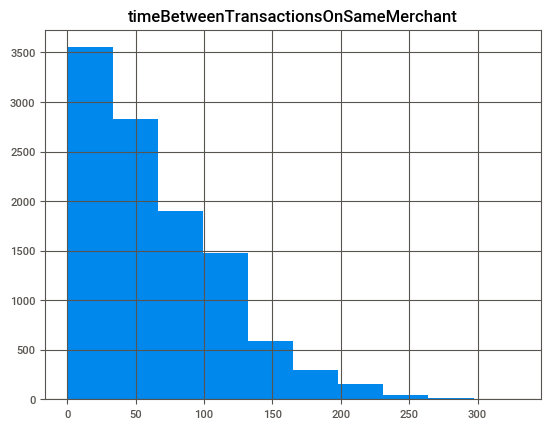

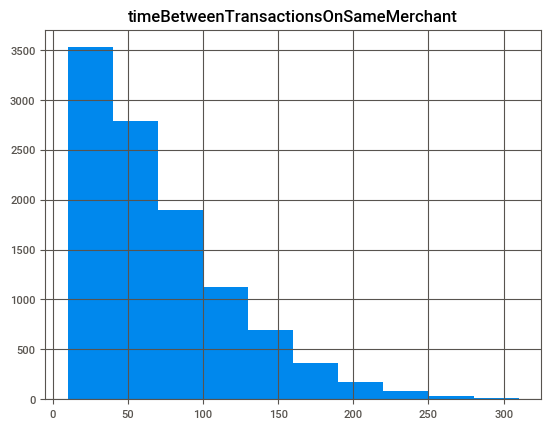

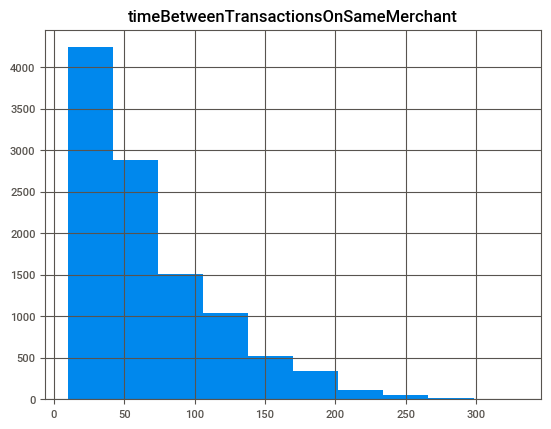

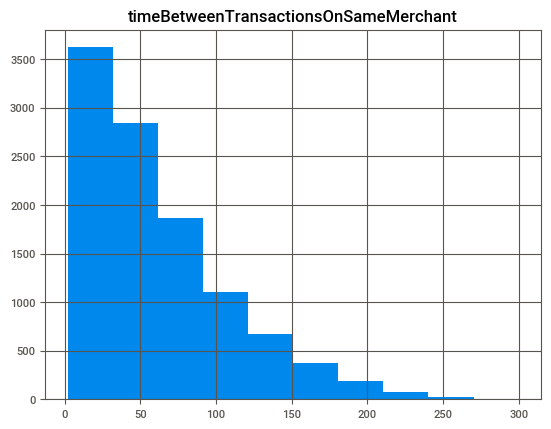

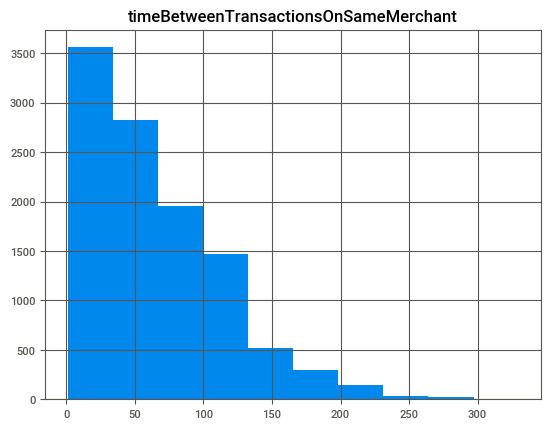

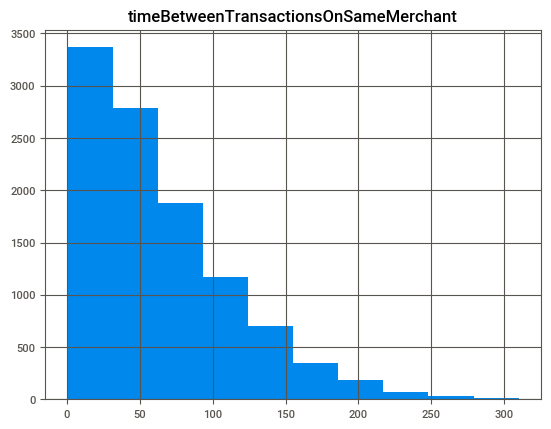

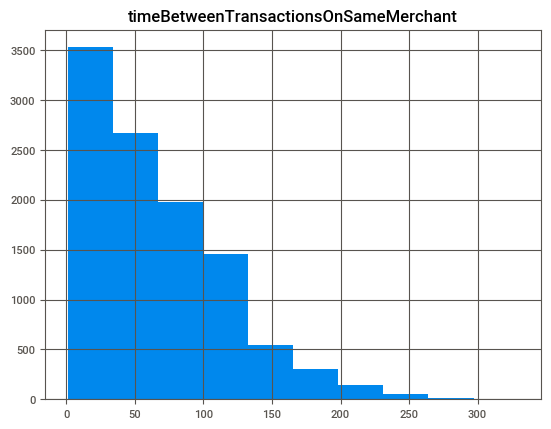

In [128]:
data.groupby('merchant')[['timeBetweenTransactionsOnSameMerchant']].hist()

In [67]:
data.tail()

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V28,Amount,Class,timeBetweenTransactions,trendTimeBetweenTrasactions,timeBetweenTransactionsOnSameMerchant,trendTimeBetweenTrasactionsOnSameMerchant,runningMeanAmountByCCCNByMerchant,runningStdevAmountByCCCNByMerchant,anormalAmount
284802,676399935474,46.23899,-63.13414,81122.0,gas_station_1,1.198770,0.209336,0.087321,1.002979,0.011673,...,0.014175,18.43,0,10.0,1.0,NaN,NaN,18.430,NaN,0
284803,676399935474,32.35126,-95.30106,81152.0,gas_station_2,1.446649,-0.558620,0.212891,-1.029449,-0.357907,...,0.007678,10.50,0,30.0,1.0,NaN,NaN,10.500,NaN,0
284804,676399935474,19.32889,-99.32556,81072.0,restaurant_2,-1.301297,0.038331,-0.095395,1.527137,-1.463943,...,0.223225,490.00,0,NaN,NaN,NaN,NaN,490.000,NaN,0
284805,676399935474,16.75973,-93.11308,81102.0,store_1,-1.999989,1.011410,1.019409,1.874324,-1.307486,...,-0.144894,52.27,0,30.0,1.0,NaN,NaN,52.270,NaN,0
284806,676399935474,50.26729,-119.27337,81112.0,store_1,1.033252,-0.843960,0.270340,0.247737,-0.467541,...,0.037263,148.00,0,10.0,1.0,10.0,1.0,100.135,67.691332,0


In [68]:
data.loc[data.credit_card_number == '676399935474'][['timestamp', 'timeBetweenTransactionsOnSameMerchant', 'merchant']]

,timestamp,timeBetweenTransactionsOnSameMerchant,merchant
284801,81212.0,NaN,fligh_tickets
284802,81122.0,NaN,gas_station_1
284803,81152.0,NaN,gas_station_2
284804,81072.0,NaN,restaurant_2
284805,81102.0,NaN,store_1
284806,81112.0,10.0,store_1


In [171]:
data['timesUsingSameMerchant'] = (
    data.groupby(['credit_card_number', 'merchant']).cumcount() + 1
)

In [172]:
data.head()

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,V28,Amount,Class,timeBetweenTransactions,timeBetweenTransactionsOnSameMerchant,trendTimeBetweenTrasactionsOnSameMerchant,runningMeanAmountByCCNByMerchant,runningStdevAmountByCCNByMerchant,anormalAmount,timesUsingSameMerchant
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,-0.021053,149.62,0,NaN,NaN,NaN,149.62,NaN,0,1
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,0.014724,2.69,0,10.0,NaN,NaN,2.69,NaN,0,1
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,-0.059752,378.66,0,60.0,NaN,NaN,378.66,NaN,0,1
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,0.061458,123.50,0,30.0,NaN,NaN,123.50,NaN,0,1
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,0.215153,69.99,0,60.0,NaN,NaN,69.99,NaN,0,1


In [178]:
data[data.credit_card_number=='060454729215']

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,Amount,Class,timeBetweenTransactions,timeBetweenTransactionsOnSameMerchant,trendTimeBetweenTrasactionsOnSameMerchant,runningMeanAmountByCCNByMerchant,runningStdevAmountByCCNByMerchant,anormalAmount,timesUsingSameMerchant,first_time_merchant
154695,060454729215,38.54491,-121.74052,102625.0,store_2,-2.422125,2.489218,-0.662616,-1.070810,0.569316,...,7.14,0,NaN,NaN,NaN,7.14,NaN,0,1,1
154696,060454729215,31.84568,-102.36764,102685.0,gas_station_1,0.051370,0.248181,0.704721,-0.959632,-0.208616,...,83.00,0,60.0,NaN,NaN,83.00,NaN,0,1,1
154697,060454729215,34.15429,3.50309,102690.0,fligh_tickets,-4.221221,2.871121,-5.888716,6.890952,-3.404894,...,7.59,1,5.0,NaN,NaN,7.59,NaN,0,1,1


In [180]:
fraud_users = data.groupby('credit_card_number')['Class'].transform('max')

In [181]:
data['fraud_cc'] = fraud_users

In [185]:
data[data.fraud_cc==1]

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,Class,timeBetweenTransactions,timeBetweenTransactionsOnSameMerchant,trendTimeBetweenTrasactionsOnSameMerchant,runningMeanAmountByCCNByMerchant,runningStdevAmountByCCNByMerchant,anormalAmount,timesUsingSameMerchant,first_time_merchant,fraud_cc
537,3529516319441573,20.21322,-100.88023,403.0,gas_station_1,1.085214,-0.228464,0.774503,1.379282,-0.469900,...,0,NaN,NaN,NaN,15.000,NaN,0,1,1,1
538,3529516319441573,45.43341,-73.86586,413.0,store_1,0.638806,1.772451,-1.748258,1.297700,1.785872,...,0,10.0,NaN,NaN,0.990,NaN,0,1,1,1
539,3529516319441573,20.21322,-100.88023,443.0,fligh_tickets,-0.844953,1.396044,1.325804,0.503092,0.005609,...,0,30.0,NaN,NaN,27.130,NaN,0,1,1,1
540,3529516319441573,41.47892,-87.45476,453.0,gas_station_2,-0.814054,1.538222,1.115690,-0.051667,0.092334,...,0,10.0,NaN,NaN,1.980,NaN,0,1,1,1
541,3529516319441573,35.06544,1.04945,454.0,fligh_tickets,-2.312227,1.951992,-1.609851,3.997906,-0.522188,...,1,1.0,11.0,1.0,13.565,19.183807,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281143,4633333934685516835,17.94979,-94.91386,169995.0,fligh_tickets,-1.321888,1.855399,-0.917960,0.998828,0.142356,...,0,30.0,NaN,NaN,6.240,NaN,0,1,1,1
281144,4633333934685516835,46.32374,-120.00865,169995.5,store_1,-3.113832,0.585864,-5.399730,1.817092,-0.840618,...,1,0.5,30.5,1.0,127.420,166.283231,0,2,0,1
281674,2242544644435175,40.60538,-73.75513,170348.0,fligh_tickets,1.991976,0.158476,-2.583441,0.408670,1.151147,...,1,NaN,NaN,NaN,42.530,NaN,0,1,1,1
281675,2242544644435175,19.32889,-99.32556,170408.0,store_2,-1.418143,0.328588,-0.239232,-0.113175,0.741763,...,0,60.0,NaN,NaN,12.480,NaN,0,1,1,1


In [191]:
data[data.credit_card_number=='3529516319441573'][['latitude', 'longitude', 'timestamp', 'merchant', 'Class', 'timeBetweenTransactions', 'timeBetweenTransactionsOnSameMerchant',
                                                   'trendTimeBetweenTrasactionsOnSameMerchant', 'Amount', 'runningMeanAmountByCCNByMerchant', 'runningStdevAmountByCCNByMerchant',
                                                   'anormalAmount', 'timesUsingSameMerchant', 'first_time_merchant', ]]

,latitude,longitude,timestamp,merchant,Class,timeBetweenTransactions,timeBetweenTransactionsOnSameMerchant,trendTimeBetweenTrasactionsOnSameMerchant,Amount,runningMeanAmountByCCNByMerchant,runningStdevAmountByCCNByMerchant,anormalAmount,timesUsingSameMerchant,first_time_merchant
537,20.21322,-100.88023,403.0,gas_station_1,0,NaN,NaN,NaN,15.00,15.000,NaN,0,1,1
538,45.43341,-73.86586,413.0,store_1,0,10.0,NaN,NaN,0.99,0.990,NaN,0,1,1
539,20.21322,-100.88023,443.0,fligh_tickets,0,30.0,NaN,NaN,27.13,27.130,NaN,0,1,1
540,41.47892,-87.45476,453.0,gas_station_2,0,10.0,NaN,NaN,1.98,1.980,NaN,0,1,1
541,35.06544,1.04945,454.0,fligh_tickets,1,1.0,11.0,1.0,0.00,13.565,19.183807,0,2,0
542,49.88307,-119.48568,514.0,store_1,0,60.0,101.0,1.0,46.68,23.835,32.307709,0,2,0
543,40.81,-73.9625,544.0,gas_station_2,0,30.0,91.0,1.0,146.25,74.115,102.014295,0,2,0


In [192]:
data['numTransactionsByCC'] = data.groupby('credit_card_number')['credit_card_number'].transform('count')

In [195]:
import geopandas as gp
from shapely.geometry import Point


In [196]:
data.head()

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,timeBetweenTransactions,timeBetweenTransactionsOnSameMerchant,trendTimeBetweenTrasactionsOnSameMerchant,runningMeanAmountByCCNByMerchant,runningStdevAmountByCCNByMerchant,anormalAmount,timesUsingSameMerchant,first_time_merchant,fraud_cc,numTransactionsByCC
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,NaN,NaN,NaN,149.62,NaN,0,1,1,0,7
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,10.0,NaN,NaN,2.69,NaN,0,1,1,0,7
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,60.0,NaN,NaN,378.66,NaN,0,1,1,0,7
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,30.0,NaN,NaN,123.50,NaN,0,1,1,0,7
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,60.0,NaN,NaN,69.99,NaN,0,1,1,0,7


In [197]:
data['crentroid'] = data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [200]:
data[['latitude', 'longitude', 'crentroid']]

,latitude,longitude,crentroid
0,19.64745,-102.04897,POINT (-102.04897 19.64745)
1,37.95143,-91.77127,POINT (-91.77127 37.95143)
2,25.87972,-97.50417,POINT (-97.50417 25.87972)
3,40.63316,-74.13653,POINT (-74.13653 40.63316)
4,16.75973,-93.11308,POINT (-93.11308 16.75973)
...,...,...,...
284802,34.09668,-117.71978,POINT (-117.71978 34.09668)
284803,25.87972,-97.50417,POINT (-97.50417 25.87972)
284804,34.63915,-120.45794,POINT (-120.45794 34.63915)
284805,20.28527,-103.42897,POINT (-103.42897 20.28527)


In [201]:
data['prevLat'] = data.groupby('credit_card_number')['latitude'].shift(1)
data['prevLong'] = data.groupby('credit_card_number')['longitude'].shift(1)



In [203]:
from geopy.distance import geodesic

In [205]:
import pandas as pd

In [217]:
def computeDistance(row, same_merchant=False):
    prevlat = 'prevLat'
    prevlong = 'prevLong'
    if same_merchant:
        prevlat = 'prevLatSameMerchant'
        prevlong = 'prevLongSameMerchant'
    
    if pd.isna(row[prevlat]) or pd.isna(row[prevlong]):
        return 0.0
    curr_point = (row['latitude'], row['longitude'])
    prev_point = (row[prevlat], row[prevlong])
    return geodesic(curr_point, prev_point).kilometers

In [209]:
data['distanceBetweenApplications'] = data.apply(computeDistance, axis=1)

In [216]:
data['prevLatSameMerchant'] = data.groupby(['credit_card_number', 'merchant'])['latitude'].shift(1)
data['prevLongSameMerchant'] = data.groupby(['credit_card_number', 'merchant'])['longitude'].shift(1)

In [213]:
data[['latitude', 'prevLatSameMerchant', 'merchant', 'credit_card_number']]

,latitude,prevLatSameMerchant,merchant,credit_card_number
0,19.64745,NaN,store_1,676209430740
1,37.95143,NaN,restaurant_1,676209430740
2,25.87972,NaN,fligh_tickets,676209430740
3,40.63316,NaN,gas_station_1,676209430740
4,16.75973,NaN,gas_station_2,676209430740
...,...,...,...,...
284802,34.09668,38.06084,restaurant_2,4379584275577993161
284803,25.87972,45.43341,gas_station_1,4379584275577993161
284804,34.63915,NaN,store_1,4379584275577993161
284805,20.28527,NaN,restaurant_1,4379584275577993161


In [215]:
data[data.credit_card_number == '676209430740'][['latitude', 'prevLatSameMerchant', 'merchant', 'credit_card_number']]

,latitude,prevLatSameMerchant,merchant,credit_card_number
0,19.64745,NaN,store_1,676209430740
1,37.95143,NaN,restaurant_1,676209430740
2,25.87972,NaN,fligh_tickets,676209430740
3,40.63316,NaN,gas_station_1,676209430740
4,16.75973,NaN,gas_station_2,676209430740
5,41.14676,19.64745,store_1,676209430740
6,53.51684,NaN,restaurant_2,676209430740


In [219]:
data['distanceBetweenApplicationsOnSameMerchant'] = data.apply(lambda row: computeDistance(row, same_merchant=True), axis=1)

In [220]:
data[data.credit_card_number == '676209430740'][['latitude', 'distanceBetweenApplicationsOnSameMerchant', 'merchant', 'credit_card_number']]

,latitude,distanceBetweenApplicationsOnSameMerchant,merchant,credit_card_number
0,19.64745,0.000000,store_1,676209430740
1,37.95143,0.000000,restaurant_1,676209430740
2,25.87972,0.000000,fligh_tickets,676209430740
3,40.63316,0.000000,gas_station_1,676209430740
4,16.75973,0.000000,gas_station_2,676209430740
5,41.14676,3604.008539,store_1,676209430740
6,53.51684,0.000000,restaurant_2,676209430740


In [221]:
data.columns

Index(['credit_card_number', 'latitude', 'longitude', 'timestamp', 'merchant',
       'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'timeBetweenTransactions', 'timeBetweenTransactionsOnSameMerchant',
       'trendTimeBetweenTrasactionsOnSameMerchant',
       'runningMeanAmountByCCNByMerchant', 'runningStdevAmountByCCNByMerchant',
       'anormalAmount', 'timesUsingSameMerchant', 'first_time_merchant',
       'fraud_cc', 'numTransactionsByCC', 'crentroid', 'prevLat', 'prevLong',
       'distanceBetweenApplications', 'prevLatSameMerchant',
       'prevLongSameMerchant', 'distanceBetweenApplicationsOnSameMerchant'],
      dtype='object')

In [222]:
dc = ['prevLat', 'prevLong', 'prevLatSameMerchant', 'prevLongSameMerchant', 'first_time_merchant', 'fraud_cc']

In [223]:
from pycaret.classification import *

In [227]:
from sklearn.model_selection import train_test_split

In [229]:
data.reset_index(inplace=True)

In [230]:
data[data.Class==1]

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,first_time_merchant,fraud_cc,numTransactionsByCC,crentroid,prevLat,prevLong,distanceBetweenApplications,prevLatSameMerchant,prevLongSameMerchant,distanceBetweenApplicationsOnSameMerchant
541,3529516319441573,35.06544,1.04945,454.0,fligh_tickets,-2.312227,1.951992,-1.609851,3.997906,-0.522188,...,0,1,7,POINT (1.04945 35.06544),41.47892,-87.45476,7427.210944,20.21322,-100.88023,9770.341864
623,4603492350748903,31.76212,-95.63079,474.0,restaurant_1,-3.043541,-3.157307,1.088463,2.288644,1.359805,...,1,1,7,POINT (-95.63079 31.76212),47.92526,-97.03285,1798.566966,NaN,NaN,0.000000
4920,3537753490237575,-36.9256,-73.02841,4463.0,fligh_tickets,-2.303350,1.759247,-0.359745,2.330243,-0.821628,...,1,1,6,POINT (-73.02841 -36.9256),43.16547,-77.70066,8881.977354,NaN,NaN,0.000000
6108,2288812614696364,17.94979,-94.91386,7015.5,fligh_tickets,-4.397974,1.358367,-2.592844,2.679787,-1.128131,...,1,1,7,POINT (-94.91386 17.94979),20.21322,-100.88023,675.965948,NaN,NaN,0.000000
6329,3572297013927151,23.9028,89.11943,7524.0,store_1,1.234235,3.019740,-4.304597,4.732795,3.624201,...,1,1,4,POINT (89.11943 23.9028),19.8173,-97.35992,15117.099897,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,213167551590516,-31.4488,-60.93173,169143.5,restaurant_2,-1.927883,1.125653,-4.518331,1.749293,-1.566487,...,1,1,6,POINT (-60.93173 -31.4488),33.95015,-118.03917,9394.497929,NaN,NaN,0.000000
280143,639087280769,-33.79176,151.08057,169349.5,fligh_tickets,1.378559,1.289381,-5.004247,1.411850,0.442581,...,1,1,5,POINT (151.08057 -33.79176),45.43341,-73.86586,16009.046752,NaN,NaN,0.000000
280149,4059919434944511,50.26729,-119.27337,169411.5,restaurant_2,-0.676143,1.126366,-2.213700,0.468308,-1.120541,...,1,1,6,POINT (-119.27337 50.26729),46.23899,-63.13414,4093.130965,NaN,NaN,0.000000
281144,4633333934685516835,46.32374,-120.00865,169995.5,store_1,-3.113832,0.585864,-5.399730,1.817092,-0.840618,...,0,1,3,POINT (-120.00865 46.32374),17.94979,-94.91386,3902.270893,53.51684,-113.3187,932.299098


In [2]:
def buid_train_set(fusers, nfusers, df):
    fraud_users = fusers[:int(len(fusers) * 0.8)]
    no_fraud_users = nfusers[:int(len(nfusers) * 0.8)]
    train_users = list(set(list(fraud_users) + list(no_fraud_users)))
    train_set = df[df.credit_card_number.isin(train_users)]
    return train_set

    

def split_train_test_val_set(df):
    fraud_users = df[df.Class==1].credit_card_number.unique().tolist()
    no_fraud_users = df[df.Class==0].credit_card_number.unique().tolist()
    train_set = buid_train_set(fraud_users, no_fraud_users, df)
    test_set = df[~df.credit_card_number.isin(train_set.credit_card_number.tolist())]
    return train_set, test_set
    

In [255]:
train_set

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,first_time_merchant,fraud_cc,numTransactionsByCC,crentroid,prevLat,prevLong,distanceBetweenApplications,prevLatSameMerchant,prevLongSameMerchant,distanceBetweenApplicationsOnSameMerchant
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,1,0,7,POINT (-102.04897 19.64745),NaN,NaN,0.000000,NaN,NaN,0.000000
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,1,0,7,POINT (-91.77127 37.95143),19.64745,-102.04897,2259.562748,NaN,NaN,0.000000
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,1,0,7,POINT (-97.50417 25.87972),37.95143,-91.77127,1443.403405,NaN,NaN,0.000000
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,1,0,7,POINT (-74.13653 40.63316),25.87972,-97.50417,2708.962986,NaN,NaN,0.000000
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,1,0,7,POINT (-93.11308 16.75973),40.63316,-74.13653,3215.293211,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227979,3520763744471796,37.60876,-77.37331,145407.0,restaurant_1,-0.909697,1.300775,1.664954,2.393775,0.840002,...,1,0,4,POINT (-77.37331 37.60876),41.0051,-73.78458,487.741227,NaN,NaN,0.000000
227980,3583727111672140,21.28306,-89.66123,145308.0,gas_station_2,2.048777,0.237231,-2.635245,0.423222,0.843150,...,1,0,4,POINT (-89.66123 21.28306),NaN,NaN,0.000000,NaN,NaN,0.000000
227981,3583727111672140,49.88307,-119.48568,145338.0,gas_station_1,1.974861,-0.026069,-2.688870,0.526088,0.724973,...,1,0,4,POINT (-119.48568 49.88307),21.28306,-89.66123,4114.547469,NaN,NaN,0.000000
227982,3583727111672140,39.32011,-76.51552,145348.0,gas_station_1,-1.132636,-0.416655,-0.388208,-1.884713,1.401235,...,0,0,4,POINT (-76.51552 39.32011),49.88307,-119.48568,3551.438879,49.88307,-119.48568,3551.438879


In [277]:
import numpy as np
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [285]:
data.columns

Index(['credit_card_number', 'latitude', 'longitude', 'timestamp', 'merchant',
       'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'timeBetweenTransactions', 'timeBetweenTransactionsOnSameMerchant',
       'trendTimeBetweenTrasactionsOnSameMerchant',
       'runningMeanAmountByCCNByMerchant', 'runningStdevAmountByCCNByMerchant',
       'anormalAmount', 'timesUsingSameMerchant', 'numTransactionsByCC',
       'distanceBetweenApplications',
       'distanceBetweenApplicationsOnSameMerchant'],
      dtype='object')

In [286]:
data.to_csv('test_fixed_data.csv')

In [287]:
dc = ['prevLat', 'prevLong', 'prevLatSameMerchant', 'prevLongSameMerchant', 'first_time_merchant', 'fraud_cc', 'crentroid']
data.drop(dc, axis=1, inplace=True)

KeyError: "['prevLat', 'prevLong', 'prevLatSameMerchant', 'prevLongSameMerchant', 'first_time_merchant', 'fraud_cc', 'crentroid'] not found in axis"

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *

data = pd.read_csv('test_fixed_data.csv')

In [3]:
train_set, test_set = split_train_test_val_set(data)

In [4]:
clf_setup = setup(
    data=train_set.drop(['credit_card_number', 'timestamp'], axis=1),
    target='Class',              
    session_id=123,              
    normalize=True,                
    fix_imbalance=True,
    categorical_features=['merchant'],            
    fix_imbalance_method='smote',
)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(227984, 44)"
4,Transformed data shape,"(386988, 50)"
5,Transformed train set shape,"(318592, 50)"
6,Transformed test set shape,"(68396, 50)"
7,Numeric features,42
8,Categorical features,1
9,Rows with missing values,73.5%


In [5]:
best_model = create_model('rf')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:57:49
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [281]:
data[data.select_dtypes(include=[float]).columns] = data.select_dtypes(include=[float]).clip(lower=1e-10)